# Plotting with Pandas and Matplotlib

-----

### Learning Objectives
*After this lesson, you will be able to:*
- Implement different types of plots on a given dataset.

<!--
Talking points:
We will use Pandas and Matplotlib to create simple plots.
We'll cover plotting line plots, scatter plots, bar plots, and histograms, and a brief introduction on how to manipulate the style of your plots with Matplotlib.
-->

---------

## Recap

In the last lesson, we learned about when to use the different types of plots. Can anyone give an example of when we would use a:
 * line plot?
 * bar plot?
 * histogram?
 * scatter plot?

### Pandas and Matplotlib

<!--
Talking points:
In this lesson, we will introduce how plotting works in Pandas and Matplotlib. It is important to know that Pandas uses Matplotlib behind the scenes to make plots. So, you will notice that Pandas plotting methods often use similar parameter names as Matplotlib methods. Further, you can use Matplotlib functions in combination with Pandas methods to alter the plots after drawing them. For example, you can use Matplotlib's `xlabel` and `title` functions to label the plot's x-axis and title, respectively, after it is drawn.
-->

As we explore different types of plots, notice:

1. Different types of plots are drawn very similarly -- they even tend to share parameter names.
2. In Pandas, calling `plot()` on a `DataFrame` is different than calling it on a `Series`. Although the methods are both named `plot`, they may take different parameters.

*Sometimes Pandas can be a little frustrating... perserverence is key!*

<img src="https://media.giphy.com/media/EPcvhM28ER9XW/giphy.gif" width="200" align="left">

## Lesson Guide

- [Line Plots](#line-plots)
- [Bar Plots](#bar-plots)
- [Histograms](#histograms)
- [Scatter Plots](#scatter-plots)
- [Using Seaborn](#using-seaborn)
- [OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)](#matplotlib)
- [OPTIONAL: Additional Topics](#additional-topics)

- [Summary](#summary)

## Plotting with Pandas: How?

`<data_set>.<columns>.plot()`

**Note**: These are example plots on a ficticious dataset. We'll work with real ones in just a minute!

`population['states'].value_counts().plot()` creates:

![](https://exceljet.net/sites/default/files/styles/original_with_watermark/public/images/charttypes/line%20chart2.png?itok=lG1hqRu4)

## Plotting: Visualization Types

Line charts are default.

`# line chart`

`population['states'].value_counts().plot()`

For other charts:

`population['states'].plot(kind='bar')`

`population['states'].plot(kind='hist', bins=3);`

`population['states'].plot(kind='scatter', x='states', y='population')`

Let's try!

### Import packages

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set the plots to display in the Jupyter notebook
%matplotlib inline

# change plotting colors per client request
plt.style.use('ggplot')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Load in data sets for visualization

- [Football Records](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017): International football results from 1872 to 2018
- [Avocado Prices](https://www.kaggle.com/neuromusic/avocado-prices): Historical data on avocado prices and sales volume in multiple US markets
- [Chocolate Bar Ratings](https://www.kaggle.com/rtatman/chocolate-bar-ratings): Expert ratings of over 1,700 chocolate bars

These have been included in `./datasets` of this repo for your convenience.

In [28]:
foot = pd.read_csv('../data/international_football_results.csv')
avo = pd.read_csv('../data/avocado.csv')
choc = pd.read_csv('../data/chocolate_ratings.csv')

<a id="line-plots"></a>
## Line plots: Show the trend of a numerical variable over time
---


Let's focus on the football scores for starters.

In [29]:
foot.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


We can extract the year by converting the date to a `datetime64[ns]` object, and then using the `pd.Series.dt.year` property to return the year (as an `int`). We'll learn more about this in future lessons.

In [30]:
foot['year'] = pd.to_datetime(foot['date']).dt.year

In [31]:
foot[['date', 'year']].head(3)

,date,year
0,1872-11-30,1872
1,1873-03-08,1873
2,1874-03-07,1874


We can then get the number of games played every year by using `pd.Series.value_counts`, and using the `sort_index()` method to ensure our year is sorted chronologically.

In [32]:
foot['year'].value_counts().sort_index().head()

1872    1
1873    1
1874    1
1875    1
1876    2
Name: year, dtype: int64

Using this date, we can use the `pd.Series.plot()` method to graph **count of games** against **year of game**:

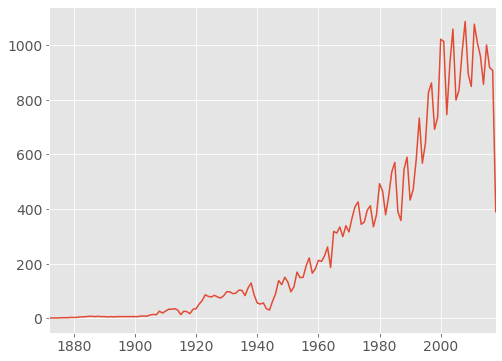

In [33]:
foot['year'].value_counts().sort_index().plot()

### Knowledge Check <img src="http://cdn.shopify.com/s/files/1/1061/1924/products/Up_Pointing_Hand_Emoji_grande.png?v=1480481048" width="30px" align="left">

Why does it make sense to use a line plot for this visualization? 

---

### Another example

---

In [34]:
foot['home_team'].sort_index().value_counts().head()

Brazil       552
Argentina    535
Germany      495
Mexico       494
England      483
Name: home_team, dtype: int64

In [35]:
foot[foot["home_team"] == "Cascadia"]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
39577,2018-06-07,Cascadia,Western Armenia,4,0,ConIFA World Football Cup,Bromley,England,True,2018


### Knowledge Check <img src="http://cdn.shopify.com/s/files/1/1061/1924/products/Up_Pointing_Hand_Emoji_grande.png?v=1480481048" width="30px" align="left">

Why would it **NOT** make sense to use a line plot for this visualization?

---

<a id="bar-plots"></a>
## Bar Plots: Show a numerical comparison across different categories
---

Count the number of games played in each country in the football dataset.

In [36]:
foot['country'].value_counts().head()

USA         1087
France       775
England      659
Malaysia     634
Sweden       632
Name: country, dtype: int64

In [37]:
foot["country"].value_counts().tail()

Tahiti               2
Micronesia FS        1
Belgian Congo        1
Mali Federation      1
Portuguese Guinea    1
Name: country, dtype: int64

Let's view the same information, but in a bar chart instead. Note we are using `.head()` to return the top 5. Also note that `value_counts()` automatically sorts by the value (read the docs!)

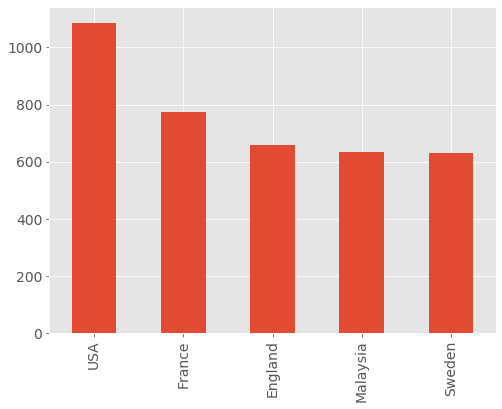

In [41]:
foot['country'].value_counts().head().plot(kind='bar')

<a id="histograms"></a>
## Histograms: Show the distribution of a numerical variable
---


Let's change to the chocolate bar dataset.

In [42]:
choc.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


### How would you split the `Rating` values into 3 equally sized bins?

In [43]:
choc['Rating'].unique()

array([3.75, 2.75, 3.  , 3.5 , 4.  , 3.25, 2.5 , 5.  , 1.75, 1.5 , 2.25,
       2.  , 1.  ])

Use a histogram! The `bins=n` kwarg allows us to specify the number of bins ('buckets') of values.

In [44]:
choc.REF

0       1876
1       1676
2       1676
3       1680
4       1704
5       1315
6       1315
7       1315
8       1319
9       1319
10      1011
11      1011
12      1011
13      1011
14      1015
15      1015
16      1015
17      1015
18      1019
19      1019
20      1019
21       797
22       797
23      1462
24      1470
25       705
26       705
27       705
28       705
29       370
        ... 
1765    1578
1766    1582
1767    1820
1768    1824
1769    1824
1770    1824
1771    1824
1772    1880
1773    1716
1774    1780
1775     697
1776     701
1777     701
1778    1205
1779     801
1780     801
1781     875
1782     875
1783     875
1784     879
1785     879
1786     879
1787     879
1788     883
1789     883
1790     647
1791     749
1792     749
1793     781
1794     486
Name: REF, Length: 1795, dtype: int64

([array([1795.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.]),
  array([1944.,  157.,  150.,  176.,  178.,  187.,  191.,  215.,  197.,
          195.])],
 array([1.0000e+00, 1.9610e+02, 3.9120e+02, 5.8630e+02, 7.8140e+02,
        9.7650e+02, 1.1716e+03, 1.3667e+03, 1.5618e+03, 1.7569e+03,
        1.9520e+03]),
 <a list of 2 Lists of Patches objects>)

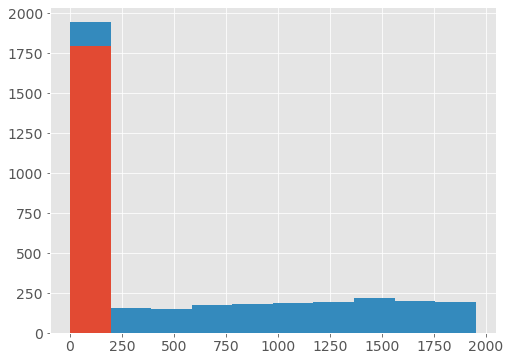

In [45]:
# choc.select_dtypes(include='number')
plt.hist([choc['Rating'].values, choc['REF'].values], stacked=True)

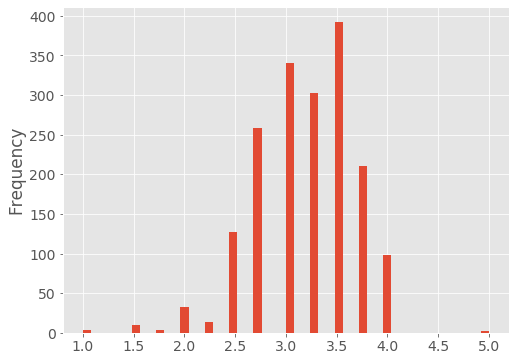

In [52]:
choc['Rating'].plot(kind='hist', bins=50)

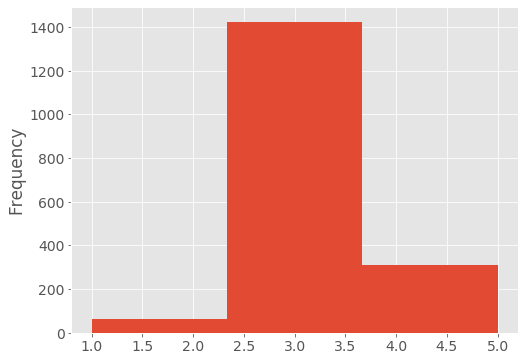

In [53]:
choc['Rating'].plot(kind='hist', bins=3)

Sometimes it is helpful to increase this number if you think you might have an outlier or a zero-weighted set.

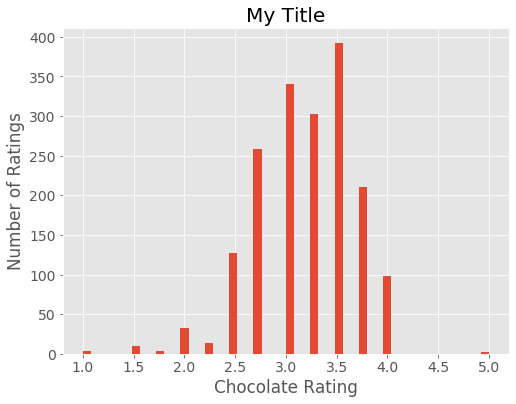

In [54]:
choc['Rating'].plot(kind='hist', bins=50)
plt.ylabel('Number of Ratings')
plt.xlabel('Chocolate Rating')
plt.title('My Title');

### Knowledge check: 
What does the y-axis represent on a histogram? What about the x-axis? How would you explain a histogram to a non-technical person?

### Making histograms of an entire dataframe:

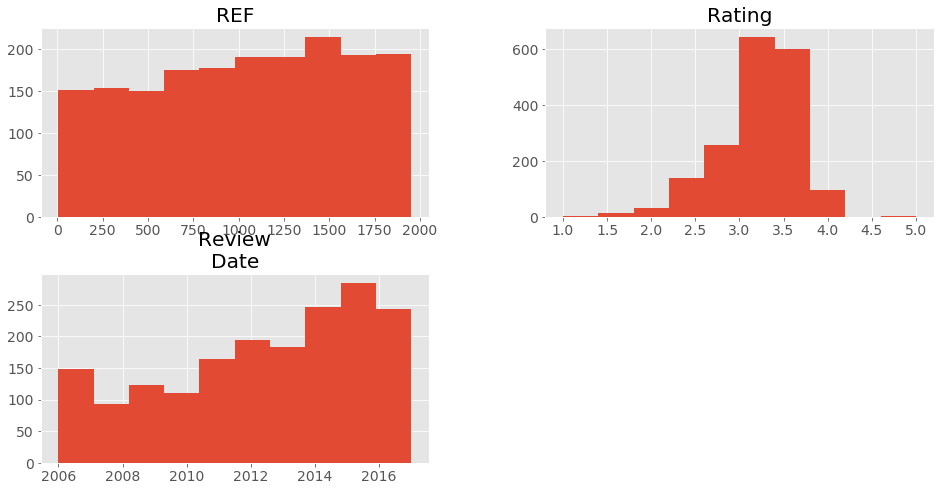

In [55]:
choc.hist(figsize=(16,8));

### Why doesn't it make plots of ALL the columns in the dataframe?

Hint: what is different about the columns it plots vs. the ones it left out?

In [56]:
choc.head(3)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo


Let's take a look at the data types of all the columns:

In [57]:
choc.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

It looks like it included `REF`, `Review Date`, and `Rating`. These have datatypes of `int64`, `int64`, and `float64` respectively. What do these all have in common, that is different from the other data types?
<br><br>
<details>
    <summary>Click for the answer!</summary>
    They're all **numeric!** The other columns are **categorical**, specifically string values.
</details>

We can filter on these types using the `select_dtypes()` DataFrame method (which can be very handy!)

In [58]:
choc.select_dtypes(include='number').head()

,REF,Review Date,Rating
0,1876,2016,3.75
1,1676,2015,2.75
2,1676,2015,3.00
3,1680,2015,3.50
4,1704,2015,3.50


### Challenge: create a histogram of the `Review Date` column, with 10 bins, and label both axes

---

In [66]:
choc.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

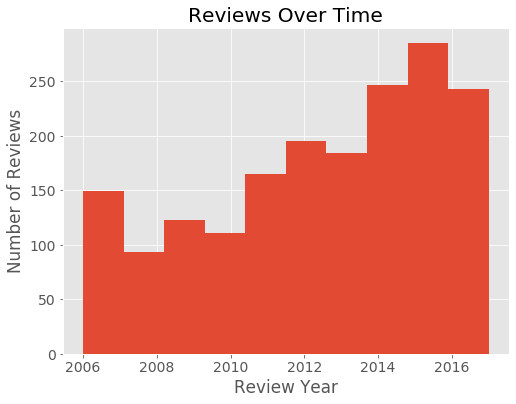

In [69]:
choc["Review\nDate"].plot(kind='hist', bins=10)
plt.ylabel('Number of Reviews')
plt.xlabel('Review Year')
plt.title('Reviews Over Time');

<a id="scatter-plots"></a>
## Scatter plots: Show the relationship between two numerical variables
---


Scatter plots are very good at showing the **interaction between two numeric variables** (especially when they're continuous)!

In [70]:
avo.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [74]:
avo["type"].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

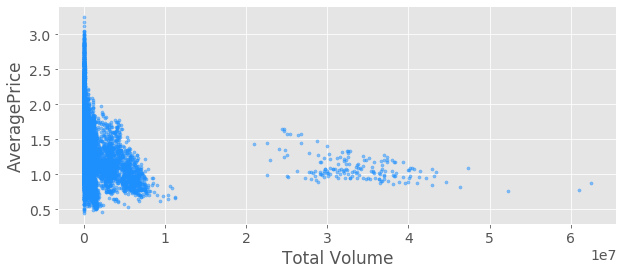

In [79]:
avo.plot(kind='scatter', x='Total Volume', y='AveragePrice', \
        color='dodgerblue', figsize=(10,4), s=10, alpha=0.5)

Oh snap! What did we just make?! It's a [price elasticity curve!](https://en.wikipedia.org/wiki/Price_elasticity_of_demand)

<img src="https://upload.wikimedia.org/wikipedia/commons/3/36/Marshall_PED.png" align="left">

We can also use a thing called a **scatter matrix** or a **pairplot**, which is a grid of scatter plots. This allows you to quickly **view the interaction of N x M features**. You are generally looking for a trend between variables (a line or curve). Using machine learning, you can fit these curves to provide predictive power.

In [76]:
avo.select_dtypes(include='number').iloc[:,-5:-1]

,Total Bags,Small Bags,Large Bags,XLarge Bags
0,8696.87,8603.62,93.25,0.00
1,9505.56,9408.07,97.49,0.00
2,8145.35,8042.21,103.14,0.00
3,5811.16,5677.40,133.76,0.00
4,6183.95,5986.26,197.69,0.00
5,6683.91,6556.47,127.44,0.00
6,8318.86,8196.81,122.05,0.00
7,6829.22,6266.85,562.37,0.00
8,11388.36,11104.53,283.83,0.00
9,8625.92,8061.47,564.45,0.00


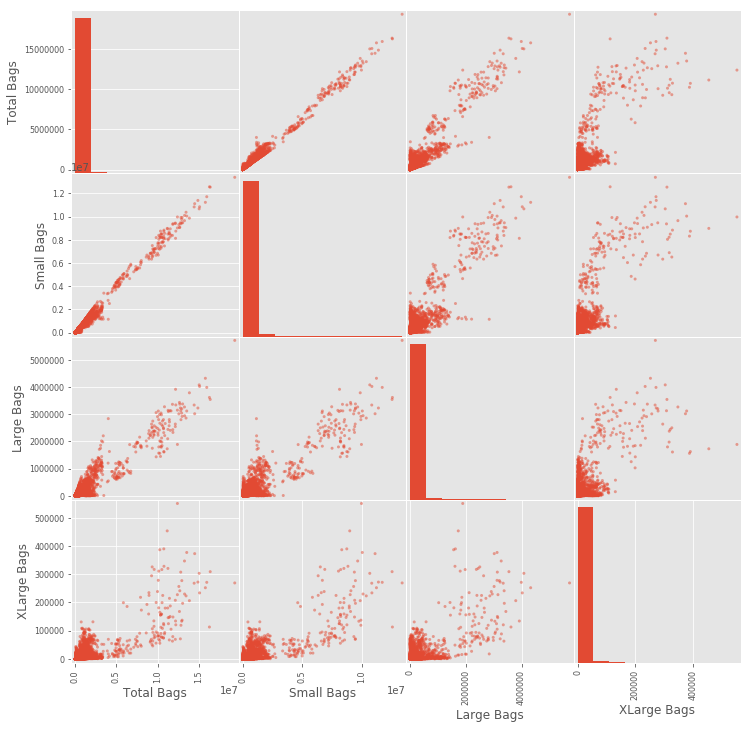

In [58]:
pd.plotting.scatter_matrix(
    avo.select_dtypes(include='number').iloc[:,-5:-1],
    figsize=(12,12)
);

We can also use a very handy parameter, `c`, which allows us to color the dots in a scatter plot. This is extremely helpful when doing **classification problems**, often you will set the color to the class label.

In [80]:
avo['type'].unique()
# Let's map the type field to the color of the dot in our price elasticity curve. To use the type field, we need to convert it from a string into a number. We can use pd.Seri

array(['conventional', 'organic'], dtype=object)

Let's map the `type` field to the color of the dot in our price elasticity curve. To use the type field, we need to convert it from a string into a number. We can use `pd.Series.apply()` for this.

In [81]:
mapping_dict = {}
initial_class_label = 0
for type in list(avo['type'].unique()):
    mapping_dict[type] = initial_class_label
    initial_class_label += 1
mapping_dict

{'conventional': 0, 'organic': 1}

We can see we have two unique type labels, `conventional` and `organic`. Although that is the case for this dataset, let's create a function that will store the labels in a dictionary, incrementing the number up by `1` for each new label. This way, if we receive an additional type label in the future, our code won't break. Always think about extensible code!

Now we can use this `mapping_dict` dictionary to map the values using `.apply()`:

In [82]:
avo['type_as_num'] = avo['type'].apply(lambda x: mapping_dict[x])
avo[['type', 'type_as_num']].head(3)

,type,type_as_num
0,conventional,0
1,conventional,0
2,conventional,0


Finally, we can use this **binary class label** as our `c` parameter to gain some insight:

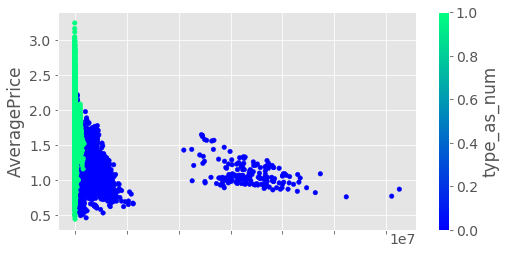

In [84]:
avo.plot(kind='scatter', x='Total Volume', y='AveragePrice', \
        c='type_as_num', colormap='winter', figsize=(8,4))
plt.xlabel('Volume')
plt.savefig('./avo_price.png');

Amazing! It looks like the organic avocados (value of `1`) totally occupy the lower volume, higher price bracket. Those dang kids with their toast and unicycles driving up the price of my 'cados!

Here, we can also see a 'more' continuous `c` parameter, `year`, which makes use of the gradient a little better. There are tons of gradients you can use, check them out [here](https://matplotlib.org/examples/color/colormaps_reference.html).

Finally, we can save the plot to a file, using the `plt.savefig()` method:

<a id="summary"></a>
### Summary

In this lesson, we showed examples of how to create a variety of plots using Pandas and Matplotlib. We also showed how to use each plot to effectively display data.

Do not be concerned if you do not remember everything — this will come with practice! Although there are many plot styles, many similarities exist between how each plot is drawn. For example, they have most parameters in common, and the same Matplotlib functions are used to modify the plot area.

We looked at:
- Line plots
- Bar plots
- Histograms
- Scatter plots

### Additional Resources

Always read the documentation!

- [Pandas Plotting Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

- [Matplotlib Documentation](https://matplotlib.org/)

- [Matplotlib sample plots](https://matplotlib.org/tutorials/introductory/sample_plots.html)